In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Hyper-Parameters

input_size = 28*28  # размер изображения в точках
hidden_size = 500   # нейронов в скрытом слое
num_classes = 10    # количество распознаваемых классов (10 цифр)
n_epochs = 2        # количество эпох
batch_szie = 4      # размер мини-пакета входных данных
lr = 0.01           # скорость обучения

In [3]:
mnist_trainset = dsets.MNIST(
    root="./data", train=True, 
    download=True, transform=transforms.ToTensor()
)
mnist_testset = dsets.MNIST(
    root="./data", train=False, 
    download=True, transform=transforms.ToTensor()
)
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


In [4]:
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_szie, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_szie, shuffle=False)

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(X, y):
        model.train()
        yhat = model(X)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

In [7]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)

In [8]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [9]:
train_step = make_train_step(model, loss_fn, optimizer)

In [10]:
for epoch in range(n_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        loss = train_step(images, labels)

    print(f"Epoch is {epoch}")

print(f"Model - {model.state_dict()}")
print(f"Loss - {loss}")

Epoch is 0
Epoch is 1
Model - OrderedDict([('0.weight', tensor([[-0.0025,  0.0019, -0.0332,  ...,  0.0125,  0.0298, -0.0070],
        [-0.0109, -0.0088, -0.0207,  ...,  0.0104, -0.0215,  0.0050],
        [-0.0197, -0.0139,  0.0305,  ..., -0.0160,  0.0337, -0.0138],
        ...,
        [ 0.0045, -0.0029, -0.0012,  ..., -0.0279, -0.0219,  0.0053],
        [ 0.0344,  0.0143,  0.0326,  ..., -0.0041, -0.0012, -0.0134],
        [-0.0188, -0.0158,  0.0045,  ...,  0.0189,  0.0206, -0.0016]],
       device='cuda:0')), ('0.bias', tensor([-0.9246, -0.0833, -0.0428, -0.0398, -0.0805, -0.0537, -0.0648, -0.3794,
        -0.0780, -0.0821, -0.0758, -0.4057, -0.4451, -0.0818, -0.0563, -0.1679,
        -0.0429, -0.0325, -0.0349, -0.0937, -0.4345, -0.0640, -0.1285, -0.0896,
        -0.0684, -0.1771, -0.1965, -0.0199, -0.4781, -0.9789, -0.0713, -0.6778,
        -0.4547, -0.0905, -0.3511, -0.0441, -0.0668, -2.6390, -0.0244, -1.0985,
        -1.0266, -0.0258, -0.3179, -0.6001, -0.0418, -0.1059, -0.0545, -0

In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Точность: {round(100 * correct / total, 2)}")

Точность: 93.09


In [14]:
len(test_loader)

2500

In [15]:
torch.save(model, "./data/mnist_full.pt")

In [17]:
model = torch.load("./data/mnist_full.pt")
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)

In [13]:
n_epochs = 16
batch_szie = 64
hidden_size = 1500

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_szie, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_szie, shuffle=False)

model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes),
)
model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        loss = train_step(images, labels)

    print(f"Epoch is {epoch}")

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Точность: {round(100 * correct / total, 2)}")

Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
Epoch is 10
Epoch is 11
Epoch is 12
Epoch is 13
Epoch is 14
Epoch is 15
Точность: 96.82


- 2 эпохи - 90%
- 4 эпохи - 93.05% 
- 8 эпох  - 93.53%

- batch_size=1 - 89.16%
- batch_size=2 - 92.06%
- batch_size=4 - 92.57%
- batch_size=8 - 93.51%
- batch_size=16 - 94.16%
- batch_size=32 - 95.95%
- batch_size=64 - 96.38%
- batch_size=max - 59.04%

- hidden_size=100 - 92.18%
- hidden_size=250 - 92.64%
- hidden_size=500 - 93.18%
- hidden_size=750 - 93.09%
- hidden_size=1000 - 93.34%
- hidden_size=1500 - 93.59%

- ReLU x2 - Точность: 92.8
- ReLU x3 - Точность: 91.1

- LeakyReLU - Точность: 93.65
- Tanh - Точность: 89.31
- ELU - Точность: 92.89
- Sigmoid - Точность: 90.79

Predicted class is 6


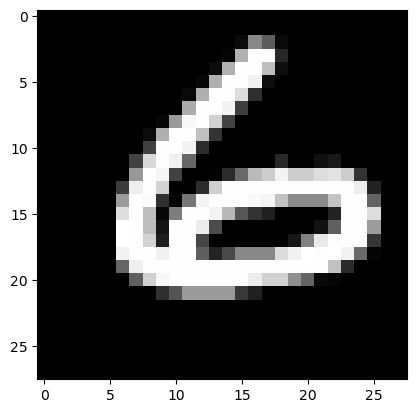

In [36]:
def show_training_results():
    images, labels = next(iter(train_loader))
    plt.imshow(images[0].reshape(28,28), cmap="gray")
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    print(f"Predicted class is {predicted[0]}")

show_training_results()